## Background
---

Airbnb “Air Bed and Breakfast”, adalah layanan yang menyediakan pemilik tempat properti untuk menyewakan ruangan / kondominiumnya sebagai tempat menginap yang menyenangkan, mudah, dan nyaman bagi banyak wisatawan selama perjalanan mereka.
Hal ini memberikan kesempatan bagi banyak orang untuk mendapatkan penghasilan tambahan dengan mendaftarkan properti mereka untuk ditinggali oleh penghuni. 


## **DATA UNDERSTANDING**
---

Untuk menjawab permasalahan diatas, kita akan menganalisis data yang telah tersedia.

### **Importing the necessary libraries**

In [408]:
# data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

### **Load Airbnb Dataset**

In [409]:
# import file data
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,2.793400e+04,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,1,2.797900e+04,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,2.874500e+04,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,3.578000e+04,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,4,9.418650e+05,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,7.900000e+17,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,7.900000e+17,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,7.900000e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,7.900000e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


##**About the Dataset – Airbnb Bookings**

- Dataset Airbnb ini berisi  15854 row dan 17 kolom data.
- Data mencakup nilai kategorik dan numerik, memberikan beragam informasi tentang daftar.
- Dataset ini mungkin berguna untuk menganalisis tren dan pola market Airbnb di Bangkok dan juga mendapatkan wawasan tentang preferensi dan perilaku pengguna Airbnb di daerah tersebut.
- Dataset ini berisi informasi tentang pemesanan Airbnb di Bangkok pada tahun 2022. Dengan menganalisis data ini, kita dapat memahami tren dan pola penggunaan Airbnb di BKK

Data set berisi yang menjelaskan informasi:

1. id : Airbnb's unique identifier for the listing.
2. name : Name of the listing.
3. host_id : Airbnb's unique identifier for the host/user.
4. host_name : Name of the host. Usually, just the first name(s).
5. neighborhood : The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
6. latitude : location of listing
7. longitude : location of listing
8. room_type : 4 unique rooms
9. price : price of listing (baht)
10. minimum_nights : minimum nights stay required for single visit
11. number_of_reviews : total rating count of listings
12. last_review : last review given
13. calculated_host_listings_count : total number of listings registered under hosts
14. availability_365 : Number of days for which host in available in a year
15. number_of_reviews_ltm : The number of reviews the listing has (in the last 12 months)

# **Data Exploration and Data Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Pertama, mari kita lihat informasi dari RAW dataset.

In [410]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,27934.0,27979.0,28745.0,35780.0,941865.0
name,Nice room with superb city view,"Easy going landlord,easy place",modern-style apartment in Bangkok,Spacious one bedroom at The Kris Condo Bldg. 3,Suite Room 3 at MetroPoint
host_id,120437,120541,123784,153730,610315
host_name,Nuttee,Emy,Familyroom,Sirilak,Kasem
neighbourhood,Ratchathewi,Bang Na,Bang Kapi,Din Daeng,Bang Kapi
latitude,13.75983,13.66818,13.75232,13.78823,13.76872
longitude,100.54134,100.61674,100.62402,100.57256,100.63338
room_type,Entire home/apt,Private room,Private room,Private room,Private room
price,1905,1316,800,1286,1905


In [411]:
#checking what are the variables here:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

---

**mengganti nama beberapa kolom terlebih dahulu untuk pemahaman yang lebih baik tentang variabel -**

In [412]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}

In [413]:
# use a pandas function to rename the current function
df = df.rename(columns = rename_col)
df.head(2)

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.5,2,353,0
1,1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0


In [414]:
#checking shape of Airbnb dataset
df.shape

(15854, 17)

In [415]:
# Cek Info Data , basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15854 non-null  int64  
 1   listing_id             15854 non-null  float64
 2   listing_name           15846 non-null  object 
 3   host_id                15854 non-null  int64  
 4   host_name              15853 non-null  object 
 5   neighbourhood          15854 non-null  object 
 6   latitude               15854 non-null  float64
 7   longitude              15854 non-null  float64
 8   room_type              15854 non-null  object 
 9   price                  15854 non-null  int64  
 10  minimum_nights         15854 non-null  int64  
 11  total_reviews          15854 non-null  int64  
 12  last_review            10064 non-null  object 
 13  reviews_per_month      10064 non-null  float64
 14  host_listings_count    15854 non-null  int64  
 15  av

**host_name, neighbourhood and room_type masuk ke dalam kategori variabel kategorikal.**
**Sedangkan host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 , number_of_reviews_ltm adalah variabel numerik**

---

In [416]:
# check duplicate rows in dataset
df = df.drop_duplicates()
df.count()

Unnamed: 0               15854
listing_id               15854
listing_name             15846
host_id                  15854
host_name                15853
neighbourhood            15854
latitude                 15854
longitude                15854
room_type                15854
price                    15854
minimum_nights           15854
total_reviews            15854
last_review              10064
reviews_per_month        10064
host_listings_count      15854
availability_365         15854
number_of_reviews_ltm    15854
dtype: int64

In [417]:
# Cek Duplikat
len(df[df.duplicated()])

0

**tidak ditemukan duplicate rows dalam Dataset**

In [418]:
# checking null values of each columns
df.isnull().sum()

Unnamed: 0                  0
listing_id                  0
listing_name                8
host_id                     0
host_name                   1
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
price                       0
minimum_nights              0
total_reviews               0
last_review              5790
reviews_per_month        5790
host_listings_count         0
availability_365            0
number_of_reviews_ltm       0
dtype: int64


**host_name** and **listing_name** tidak terlalu banyak memiliki nilai null, jadi pertama-tama kita sebaiknya mengisinya dengan beberapa pengganti pada kedua kolom tersebut terlebih dahulu.

In [419]:
df['listing_name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

In [420]:
#so the null values are removed
df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

column **last_review** dan **reviews_per_month** memiliki total 5790 nilai null.

**last_review** column tidak diperlukan untuk analisis dibandingkan dengan **number_of_reviews** & **reviews_per_month**. lebih baik menghilangkan kolom ini.

**listing_id** juga tidak terlalu penting untuk analisis , tetapi saya tidak menghapusnya karena  **listing_id** dan **listing_name** berkolerasi dan menghapus listing_id tidak akan membuat banyak perbedaan.

In [421]:
df = df.drop(['last_review'], axis=1)     #removing last_review column karena tidak begitu penting

In [422]:
df.info()      # the last_review column is deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15854 non-null  int64  
 1   listing_id             15854 non-null  float64
 2   listing_name           15854 non-null  object 
 3   host_id                15854 non-null  int64  
 4   host_name              15854 non-null  object 
 5   neighbourhood          15854 non-null  object 
 6   latitude               15854 non-null  float64
 7   longitude              15854 non-null  float64
 8   room_type              15854 non-null  object 
 9   price                  15854 non-null  int64  
 10  minimum_nights         15854 non-null  int64  
 11  total_reviews          15854 non-null  int64  
 12  reviews_per_month      10064 non-null  float64
 13  host_listings_count    15854 non-null  int64  
 14  availability_365       15854 non-null  int64  
 15  nu

The **reviews_per_month** column also containing null values and we can simple put 0 reviews by replacing NAN's

In [423]:
df['reviews_per_month'] = df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [424]:
# the null values are replaced by 0 value
df['reviews_per_month'].isnull().sum()

0

jadi tidak ada nilai null sekarang di kolom 'reviews_per_month' karena kita telah mengganti nilai null dengan nilai 0.


In [425]:
#so now check Dataset columns changed and null values, last_review column removed.
df.sample(5)

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365,number_of_reviews_ltm
3022,3022,1.724409e+07,Behind the W Hotel,109243783,Megumi,Bang Rak,13.72315,100.52965,Entire home/apt,5000,14,0,0,1,364,0
10555,10555,4.214627e+07,S.這是一個悠閒的宅焉焉小區/Near BTS Bang Chak/WiFi/1BR,202687159,Steven,Phra Khanong,13.69120,100.60009,Entire home/apt,950,1,1,0,12,170,0
6776,6776,3.154926e+07,Clean Home near Hua Mak Airport Link,236468648,Anchalee,Bang Kapi,13.75449,100.63146,Entire home/apt,1000,1,8,0,1,348,0
9806,9806,4.092453e+07,Siam Champs Elyseesi (Superior King - Room Only),133704253,Siam Champs Elyseesi Unique Hotel,Phra Nakhon,13.75489,100.50390,Private room,3935,1,0,0,8,328,0
12539,12539,5.930000e+17,11-曼谷市中心豪华温泉酒店公寓 bts thonglo 本地小吃市场免费泳池 健身房,402093105,Hi Gravity,Khlong Toei,13.71658,100.57515,Entire home/apt,1581,7,14,1,45,240,14


---
### **Check Unique Value for variables

In [426]:
# check unique values for listing/property Ids
# all the listing ids are different and each listings are different here.
df['listing_id'].nunique()

12536

In [427]:
# so there are 50 unique neighborhood in Dataset
df['neighbourhood'].nunique()

50

In [428]:
#so total 5313 different hosts in Airbnb-BKK
df['host_name'].nunique()

5313

In [429]:
# most of the listing/property are different in Dataset
df['listing_name'].nunique()

14795

**Note** - ada beberapa nama yang sama tetapi kepemilikan id host yang berbeda dalam area neighbourhood

In [430]:
df[df['host_name']=='Tor']['listing_name'].nunique()

# so here same host Tor operates different 14 listing/property

14

In [431]:
df[df['listing_name']==df['host_name']].head()

# there are few listings where the listing/property name and the host have same names

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365,number_of_reviews_ltm
612,612,4857224.0,BED STATION Hostel,24987548,BED STATION Hostel,Ratchathewi,13.75183,100.53207,Shared room,450,1,14,0,3,365,0
1875,1875,12855105.0,Bangkok Check Inn,41115006,Bangkok Check Inn,Bang Rak,13.72122,100.51375,Private room,990,1,1,0,6,333,0
2278,2278,14096705.0,VM1hostel,84836158,VM1hostel,Phaya Thai,13.77033,100.53773,Shared room,450,1,139,1,1,364,0
5743,5743,28647241.0,The Art Hostel Bangkok,150411704,The Art Hostel Bangkok,Khlong Toei,13.71408,100.58135,Hotel room,850,1,0,0,2,365,0
5836,5836,28765122.0,The Art Hostel Bangkok,150411704,The Art Hostel Bangkok,Khlong Toei,13.71341,100.58205,Hotel room,350,1,0,0,2,364,0


---

# **Describe the Dataset and removing outliers**

In [432]:
# describe the DataFrame 
display(df.describe())
df.describe(include='object')

,Unnamed: 0,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579369e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.310458,13.889618,244.378643,3.481519
std,4576.799919,2.945960e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.855036,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.000000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.000000,13.000000,360.000000,3.000000
max,15853.000000,7.910000e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.000000,228.000000,365.000000,325.000000


,listing_name,host_name,neighbourhood,room_type
count,15854,15854,15854,15854
unique,14795,5313,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


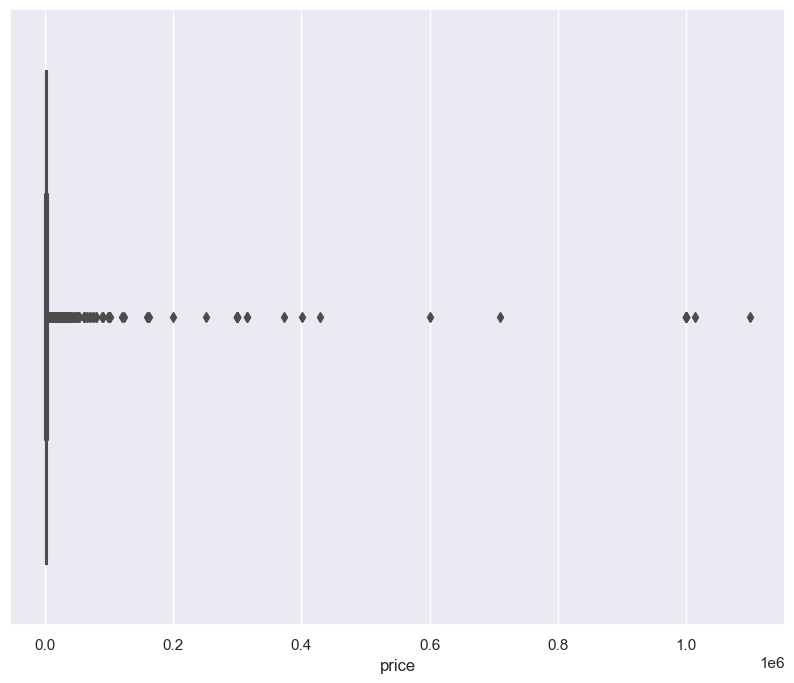

In [433]:
sns.boxplot(x = df['price'])

plt.show()

### **menggunakan IQR technique**

In [434]:
# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

In [435]:
lower_bound,upper_bound = iqr_technique(df['price'])

df = df[(df.price>lower_bound) & (df.price<upper_bound)]

(14451, 16)


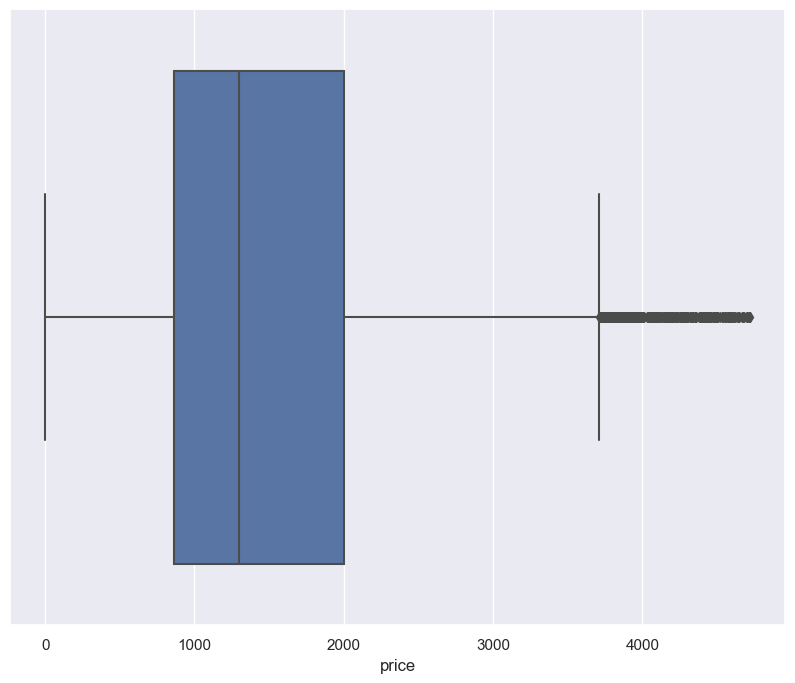

In [436]:
# so the outliers are removed from price column now check with boxplot and also check shape of new Dataframe!

sns.boxplot(x = df['price'])
print(df.shape)

In [437]:
# so here outliers are removed, see the new max price
print(df['price'].max())

4720



---

# **Data Visualization**



   **Mendistribusikan data Airbnb Bookings Price Range dengan Histogram**

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

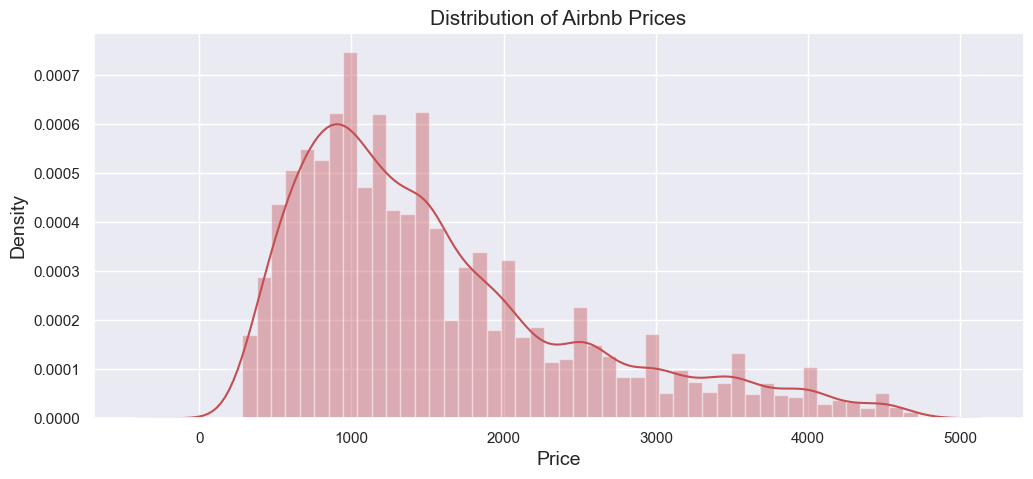

In [438]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(df['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)


* Kisaran price yang dikenakan di Airbnb terlihat dari **200 - 3500 Baht**, dengan sebagian besar listing berada di kisaran harga **1000 - 1500 Baht.**

*  alokasi price terlihat memiliki yang paling tinggi pada kisaran **1000 - 1500 baht**, 

* mungkin ada lebih sedikit listing yang tersedia dengan price diatas > **3000 baht**, karena kepadatan listing menunjukan penurunan secara signifikan dalam kisaran ini.


**Total Listing/Property jumlah dimasing-masing Neighborhood menggunakan Count plot**

In [439]:
# Count the number of listings in each neighborhood group and store the result in a Pandas series
counts = df['neighbourhood'].value_counts()

# Reset the index of the series so that the neighborhood groups become columns in the resulting dataframe
Top_Neighborhood = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_Neighborhood.columns = ['Neighborhood', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhood


,Neighborhood,Listing_Counts
0,Khlong Toei,1887
1,Vadhana,1770
2,Ratchathewi,1059
3,Huai Khwang,1031
4,Sathon,762
5,Bang Rak,738
6,Phra Nakhon,585
7,Phra Khanong,540
8,Chatu Chak,522
9,Bang Na,430


Text(0, 0.5, 'total listings counts')

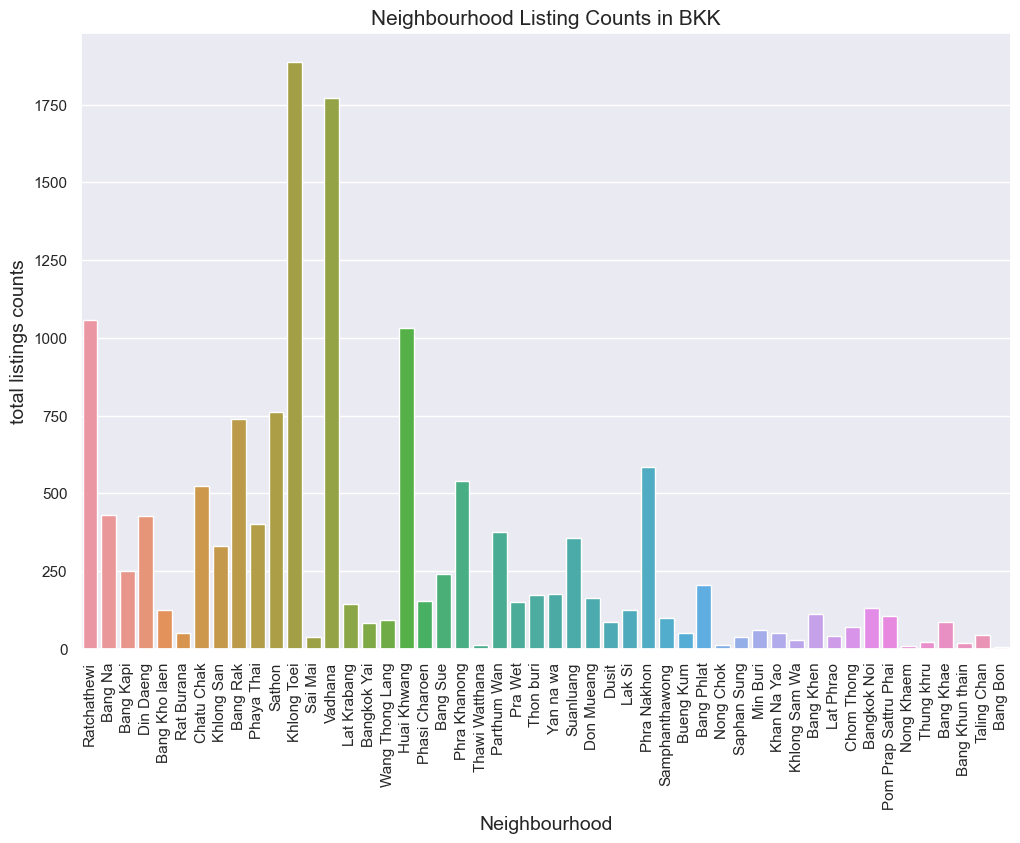

In [440]:
# Set the figure size
plt.figure(figsize=(12, 8))

#df['neighbourhood']
# Create a countplot of the neighbourhood group data
#sns.countplot(df['neighbourhood'])
sns.countplot(df, x='neighbourhood')

# Set the title of the plot
plt.title('Neighbourhood Listing Counts in BKK', fontsize=15)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)


**Price Distribution terhadap room type menggunakan Violin Plot**

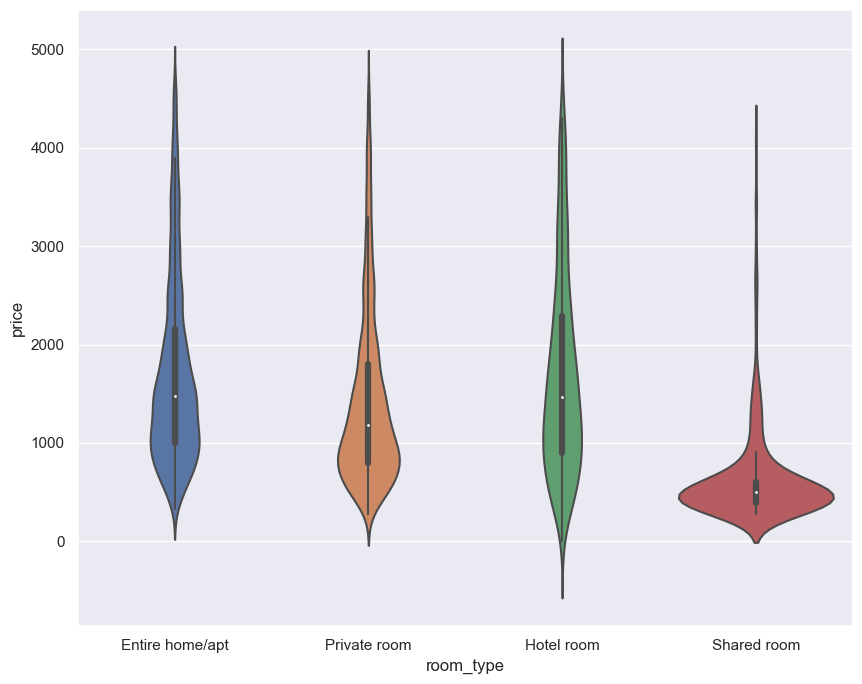

In [441]:
# Create the violin plot for price distribution in each room type

ax= sns.violinplot(x='room_type',y='price',data= df)

- Distribusi price yang paling tinggi ada di Entire home/apt dan private room. 

- shared room yang paling rendah dalam distribusi harga.

---
**Top Neighborhoods by Listing/property using Bar plot**

In [442]:
# create a new DataFrame that displays the top 10 neighborhoods in the Airbnb NYC dataset based on the number of listings in each neighborhood
Top_Neighborhoods = df['neighbourhood'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'Top_Neighborhoods' and 'Listing_Counts'
Top_Neighborhoods.columns = ['Top_Neighborhoods', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhoods


,Top_Neighborhoods,Listing_Counts
0,Khlong Toei,1887
1,Vadhana,1770
2,Ratchathewi,1059
3,Huai Khwang,1031
4,Sathon,762
5,Bang Rak,738
6,Phra Nakhon,585
7,Phra Khanong,540
8,Chatu Chak,522
9,Bang Na,430


Text(0.5, 1.0, 'Listings by Top Neighborhoods in Bangkok')

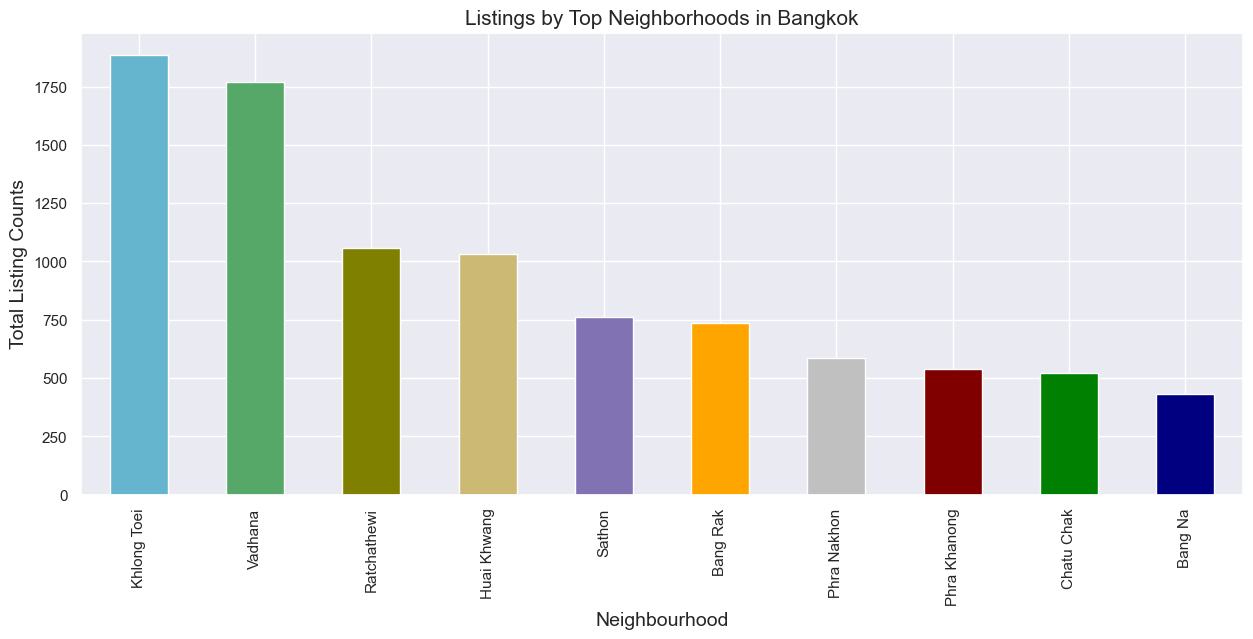

In [443]:
# Get the top 10 neighborhoods by listing count
top_10_neigbourhoods = df['neighbourhood'].value_counts().nlargest(10)

# Create a list of colors to use for the bars
colors = ['c', 'g', 'olive', 'y', 'm', 'orange', '#C0C0C0', '#800000', '#008000', '#000080']

# Create a bar plot of the top 10 neighborhoods using the specified colors
top_10_neigbourhoods.plot(kind='bar', figsize=(15, 6), color = colors)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by Top Neighborhoods in Bangkok', fontsize=15)


- Top neighborhoods di Bangkok dalam jumlah total listing adalah  khlong Toei, Vadhana, Ratchathewi, Huai Khwang 	, dan Sathon

- Top neighborhoods teratas  terletak di khlong Toei. Hal ini karena khlong Toei, sebuah distrik di pusat kota Bangkok, dan Distrik ini berbatasan dengan Sungai Chao Phraya dan memiliki fasilitas pelabuhan utama. Tempat ini juga merupakan lokasi pasar utama, Pasar Khlong Toei. (https://en.wikipedia.org/wiki/Khlong_Toei_district)

- Jumlah listing saja mungkin tidak menunjukkan permintaan keseluruhan neighborhood, karena bisa ada faktor-faktor lain seperti biaya hidup dan ketersediaan perumahan juga dapat berpengaruh.

**Top Hosts With More Listing/Property using Bar chart**


In [444]:
# create a new DataFrame that displays the top 10 hosts in the Airbnb NYC dataset based on the number of listings each host has
top_10_hosts = df['host_name'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'host_name' and 'Total_listings'
top_10_hosts.columns = ['host_name', 'Total_listings']

# display the resulting DataFrame
top_10_hosts

,host_name,Total_listings
0,Curry,221
1,Noons,97
2,K,77
3,Pornchai,63
4,Bee,58
5,Alex,58
6,Nana,55
7,Patty,54
8,Ludoping,54
9,Summer,50


Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire BKK!')

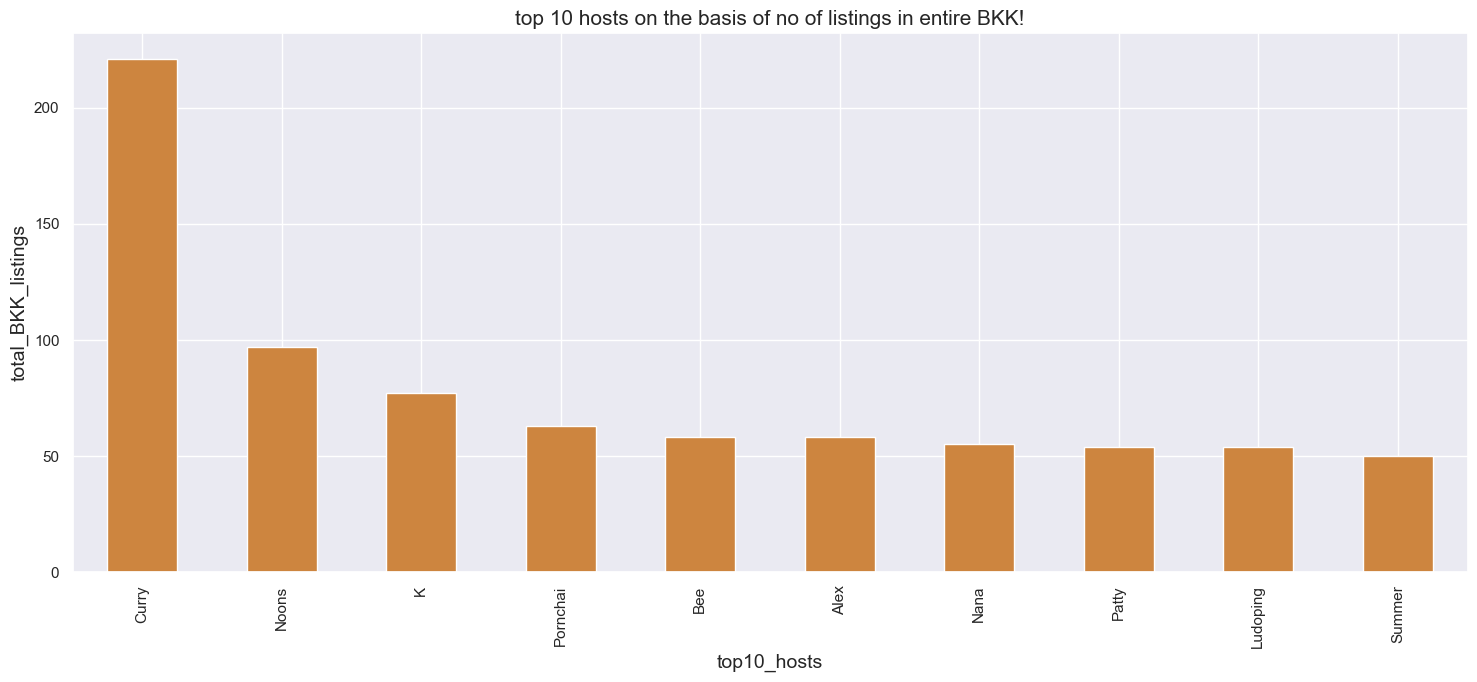

In [445]:
# Get the top 10 hosts by listing count
top_hosts = df['host_name'].value_counts()[:10]

# Create a bar plot of the top 10 hosts
top_hosts.plot(kind='bar', color='peru', figsize=(18, 7))

# Set the x-axis label
plt.xlabel('top10_hosts', fontsize=14)

# Set the y-axis label
plt.ylabel('total_BKK_listings', fontsize=14)

# Set the title of the plot
plt.title('top 10 hosts on the basis of no of listings in entire BKK!', fontsize=15)

Observations -->

-  top 3 hosts didalam total listings ada Curry, Noons, and K, yang memiliki 228, 99, and 91 jumlah listings masing-masing.

- ada perbedaan gap yang cukup besar untuk top 2 hosts dengan host lainya. contoh, K memiliki 91 listings.
  dimana secara jauh signifikan dengan host curry's yang memiliki 228 listings.

- Didalam top10 list Summer memiliki 50 listings, dimana sangat jauh secara signifikan dengan Curry memiliki 228 listings. 
  Hal ini dapat mengindikasikan bahwa ada banyak cara host dalam melakukan promo yang berbeda di Airbnb.



**Total Counts Of Each Room Type**

In [446]:
# create a new DataFrame that displays the number of listings of each room type in the Airbnb NYC dataset
top_room_type = df['room_type'].value_counts().reset_index()

# rename the columns of the resulting DataFrame to 'Room_Type' and 'Total_counts'
top_room_type.columns = ['Room_Type', 'Total_counts']

# display the resulting DataFrame
top_room_type


,Room_Type,Total_counts
0,Entire home/apt,8107
1,Private room,5281
2,Hotel room,554
3,Shared room,509


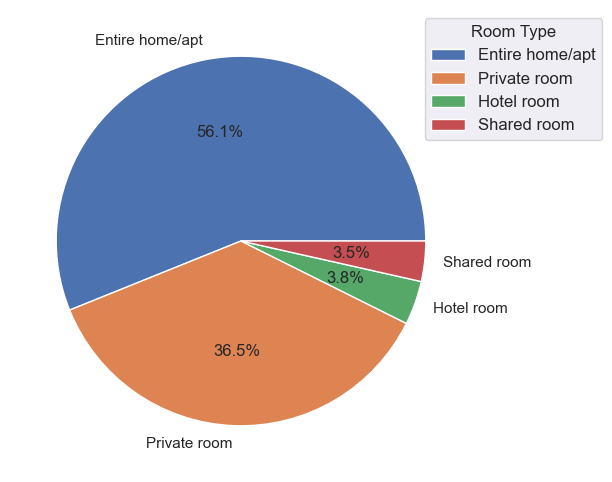

In [447]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Get the room type counts
room_type_counts = df['room_type'].value_counts()

# Set the labels and sizes for the pie chart
labels = room_type_counts.index
sizes = room_type_counts.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a legend to the chart
plt.legend(title='Room Type', bbox_to_anchor=(0.8, 0, 0.5, 1), fontsize='12')

# Show the plot
plt.show()


- Mayoritas listing dari Arbnb adalah unutk keseluruhan adai di typr Entire home/apt dengan total 8107, lalu diikuti dengan type private room sebanyak 5281, lalu ada hotel 554 dan yang terendah ada di Shared room sebanyak 509.
- Ada perbedaan signifikan dalam jumlah daftar untuk setiap tipe kamar. Sebagai contoh, hampir 16 kali lebih banyak listing apartemen dibandingkan dengan type Shared room.
- Data ini menunjukkan bahwa para travelers yang menggunakan Airbnb memiliki berbagai pilihan akomodasi yang dapat dipilih, termasuk private rooms dan apartments.

---
**Stay Requirement counts by Minimum Nights using Bar chart**

In [448]:
# Group the DataFrame by the minimum_nights column and count the number of rows in each group
min_nights_count = df.groupby('minimum_nights').size().reset_index(name = 'count')

# Sort the resulting DataFrame in descending order by the count column
min_nights_count = min_nights_count.sort_values('count', ascending=False)

# Select the top 10 rows
min_nights_count = min_nights_count.head(15)

# Reset the index
min_nights_count = min_nights_count.reset_index(drop=True)

# Display the resulting DataFrame
min_nights_count

,minimum_nights,count
0,1,7339
1,2,1550
2,30,1275
3,3,906
4,28,529
5,7,483
6,5,395
7,90,199
8,14,188
9,15,171


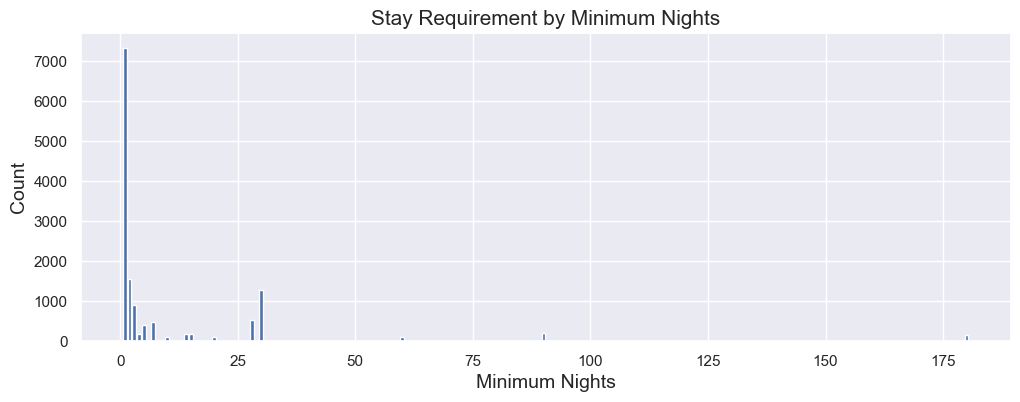

In [449]:
# Extract the minimum_nights and count columns from the DataFrame
minimum_nights = min_nights_count['minimum_nights']
count = min_nights_count['count']

# Set the figure size
plt.figure(figsize=(12, 4))

# Create the bar plot
plt.bar(minimum_nights, count)

# Add axis labels and a title
plt.xlabel('Minimum Nights', fontsize='14')
plt.ylabel('Count', fontsize='14')
plt.title('Stay Requirement by Minimum Nights', fontsize='15')

# Show the plot
plt.show()

* Mayoritas listing di Airbnb memiliki persyaratan menginap minimum 1 atau 2 malam, dengan masing-masing 7339 dan 1550 listing.

* Jumlah listing dengan persyaratan menginap minimum menurun seiring bertambahnya lama menginap, dengan 906 listing yang memiliki inap minimum 3 malam, dan seterusnya.

* Jumlah listing dengan persyaratan menginap minimum 30 malam atau lebih relatif sedikit, masing-masing 1275 dan 110 listing.

**Total Reviews by Each Neighborhood Group using Pie Chart**

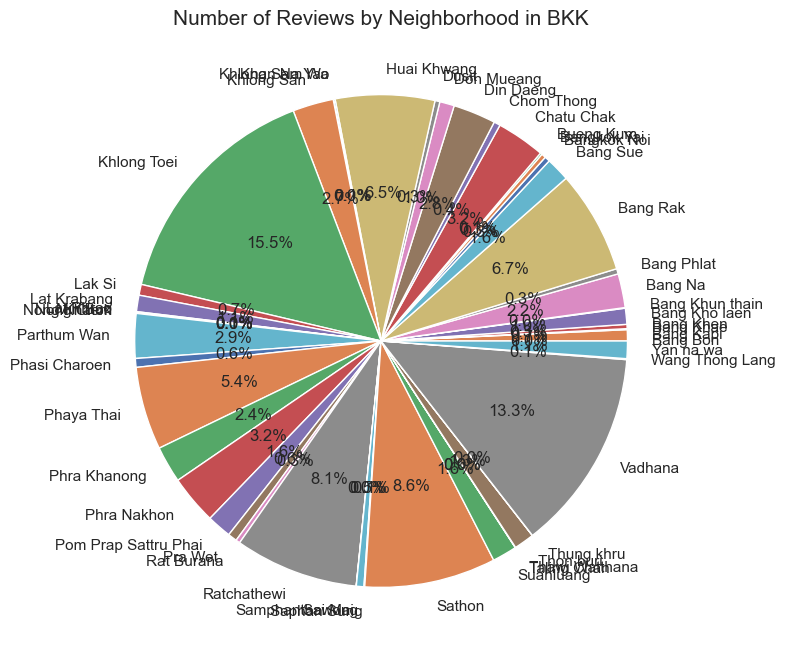

In [450]:
# Group the data by neighborhood group and calculate the total number of reviews
reviews_by_neighbourhood_group = df.groupby("neighbourhood")["total_reviews"].sum()

# Create a pie chart
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')
plt.title("Number of Reviews by Neighborhood in BKK", fontsize='15')

# Display the chart
plt.show()



In [451]:
- khlong tei memiliki bagian terbesar dari totalan ulasan AirbNb , dengan 15.5%, lalu diikuti dengan Vadhana dengan 13.3%
- Ratchathewi memiliki bagian terbesar ke tiga dari total ulasan.
- Data menunjukkan bahwa Airbnb lebih populer di daerah Khlong tei dan Vadhana dibandingkan dengan area neighborhood  lainnya.
- Meskipun memiliki lebih sedikit daftar, Brooklyn memiliki lebih banyak ulasan di Airbnb dibandingkan dengan Manhattan.
- Hal ini dapat mengindikasikan bahwa pengguna Airbnb di khlong tei lebih cenderung memberikan ulasan, 
atau bahwa daftar di khlong tei lebih populer atau berhasil menghasilkan ulasan positif. 
Perlu dicatat bahwa mungkin ada beberapa faktor lain yang dapat berkontribusi pada perbedaan ulasan ini,
seperti karakteristik traveler yang menggunakan Airbnb di area ini.

SyntaxError: invalid syntax (1361428297.py, line 1)

Text(0.5, 1.0, 'top 10 neighbourhood by total_reviews BKK!')

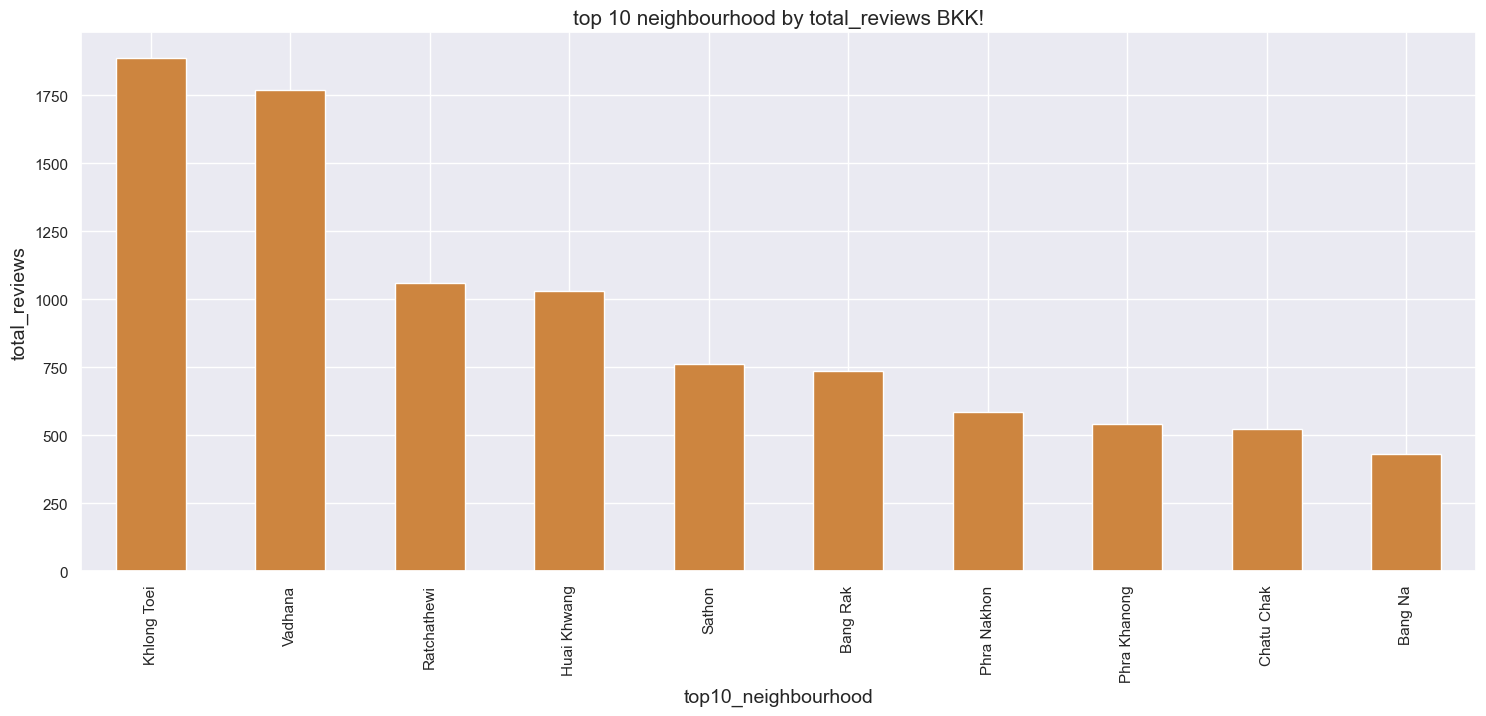

In [452]:
# Get the top 10 neighbourhood by total_reviews
top_hosts = df['neighbourhood'].value_counts()[:10]

# Create a bar plot of the top 10 hosts
top_hosts.plot(kind='bar', color='peru', figsize=(18, 7))

# Set the x-axis label
plt.xlabel('top10_neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('total_reviews', fontsize=14)

# Set the title of the plot
plt.title('top 10 neighbourhood by total_reviews BKK!', fontsize=15)

**Number of Max. Reviews by Each Neighborhood Group using Pie Chart**

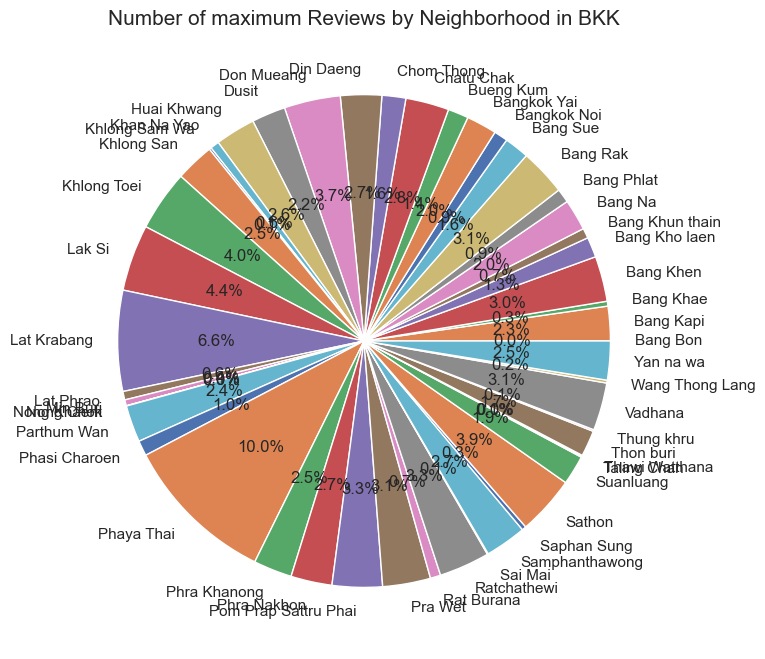

In [453]:
# Group the Airbnb data by neighbourhood group
reviews_by_neighbourhood_group = df.groupby("neighbourhood")["total_reviews"].max()

# Create a pie chart to visualize the distribution of maximum number of reviews among different neighbourhood groups
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title("Number of maximum Reviews by Neighborhood in BKK", fontsize='15')

# Display the chart
plt.show()



- phaya thai 10.0% dan Lat Krabang 6.6% menjadi lingkungan yang paling populer untuk diulas
karena keduanya memiliki jumlah ulasan maksimum yang tinggi.

**use latitude and longitude in scatterplot map and find neighbourhood and Room types in map**

Text(0.5, 1.0, 'Location Co-ordinates')

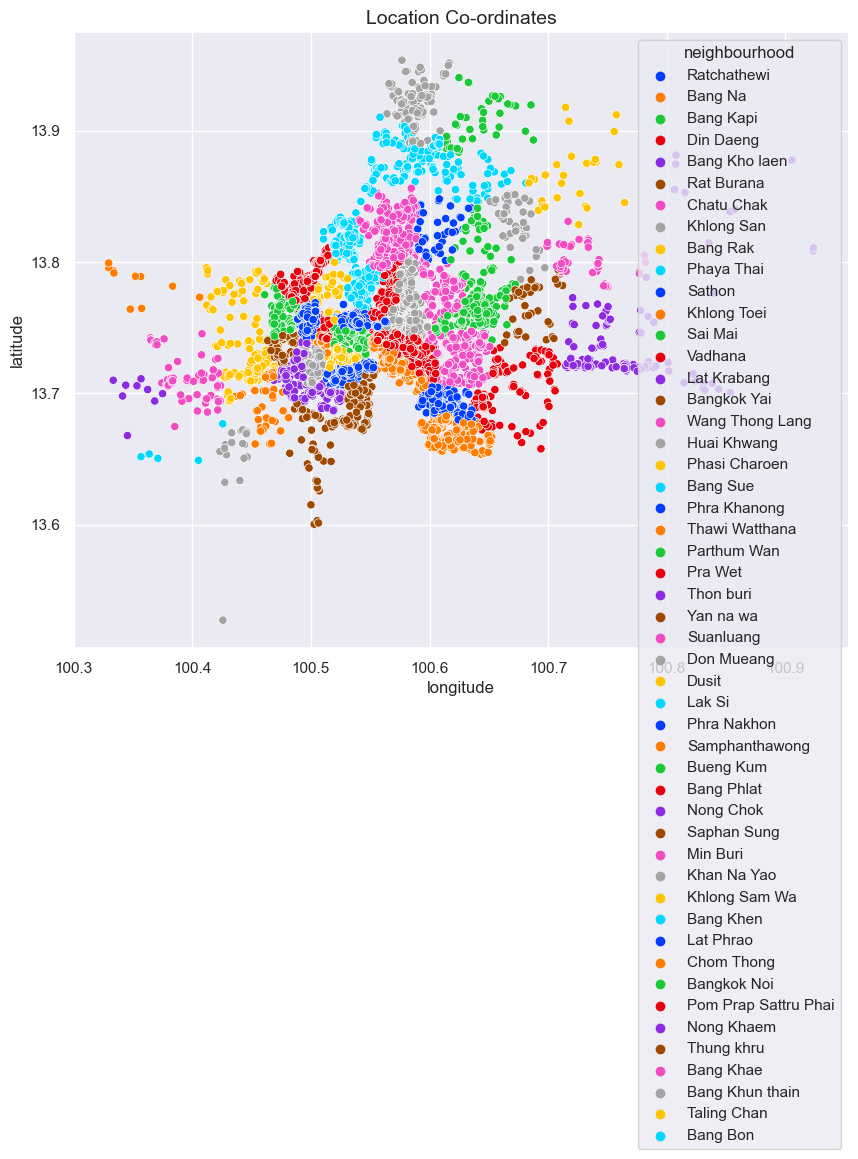

In [454]:
#trying to find where the coordinates belong from the latitude and longitude

# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb BKK dataset
ax = sns.scatterplot(data=df, x="longitude", y="latitude", hue='neighbourhood', palette='bright')

# set the title of the plot
ax.set_title('Location Co-ordinates', fontsize='14')


Text(0.5, 1.0, 'Distribution of type of rooms across BKK')

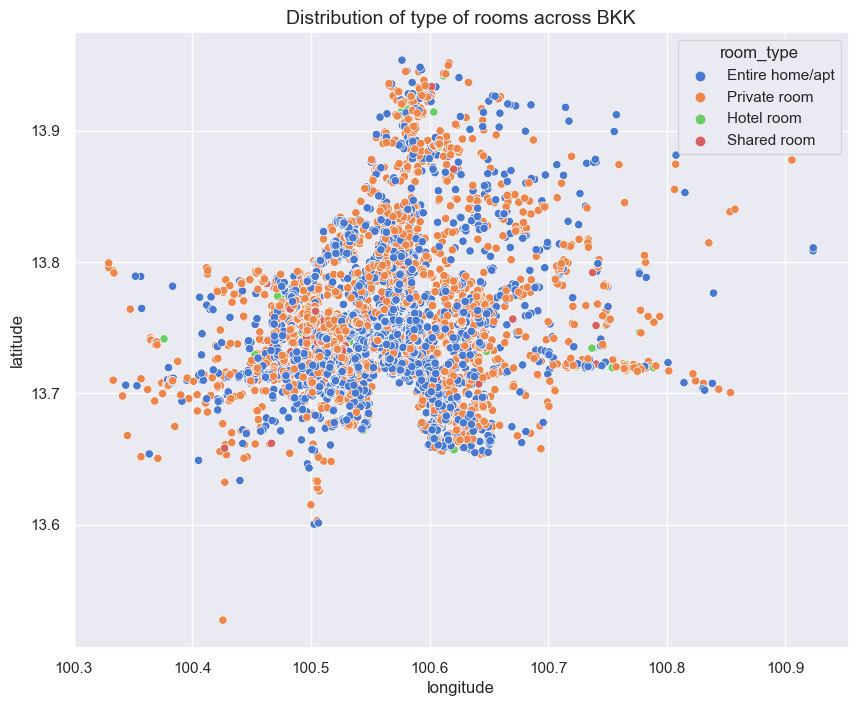

In [455]:
# Let's observe the type of room_types

# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb BKK dataset with room_types.
ax = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette='muted')

# set the title of the plot
ax.set_title('Distribution of type of rooms across BKK', fontsize='14')



**Price variations in BKK Neighbourhood using scatter plot**

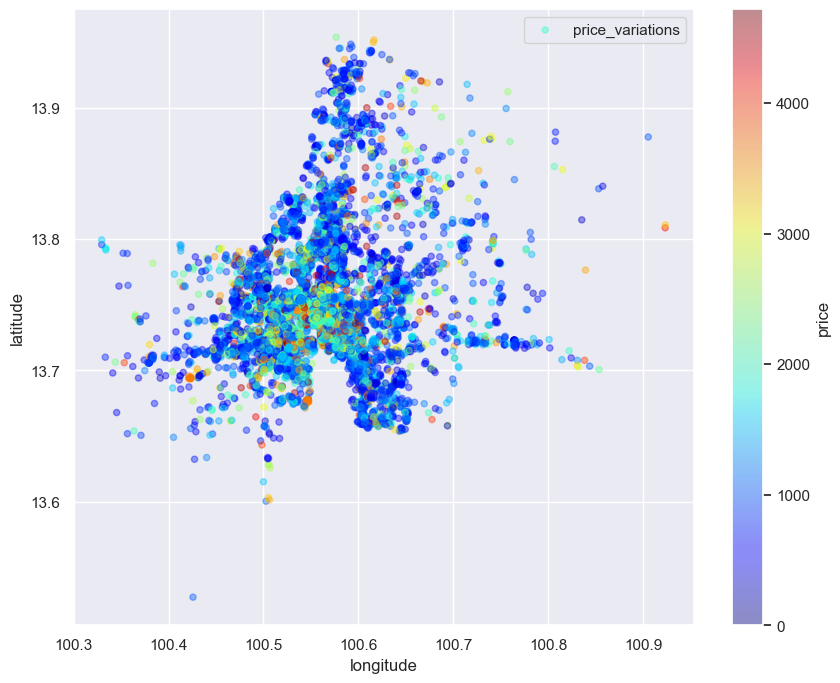

In [456]:
# Let's have an idea of the price variations in neighborhood

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb BKK dataset, with the color of each point indicating the price of the listing
lat_long = df.plot(kind='scatter', x='longitude', y='latitude', label='price_variations', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))

# add a legend to the plot
lat_long.legend()


**Find Best Location Listing/Property Location For Travelers and Hosts**

<Axes: title={'center': 'Average Airbnb Reviews by Neighborhoods in BKK City'}, xlabel='longitude', ylabel='latitude'>

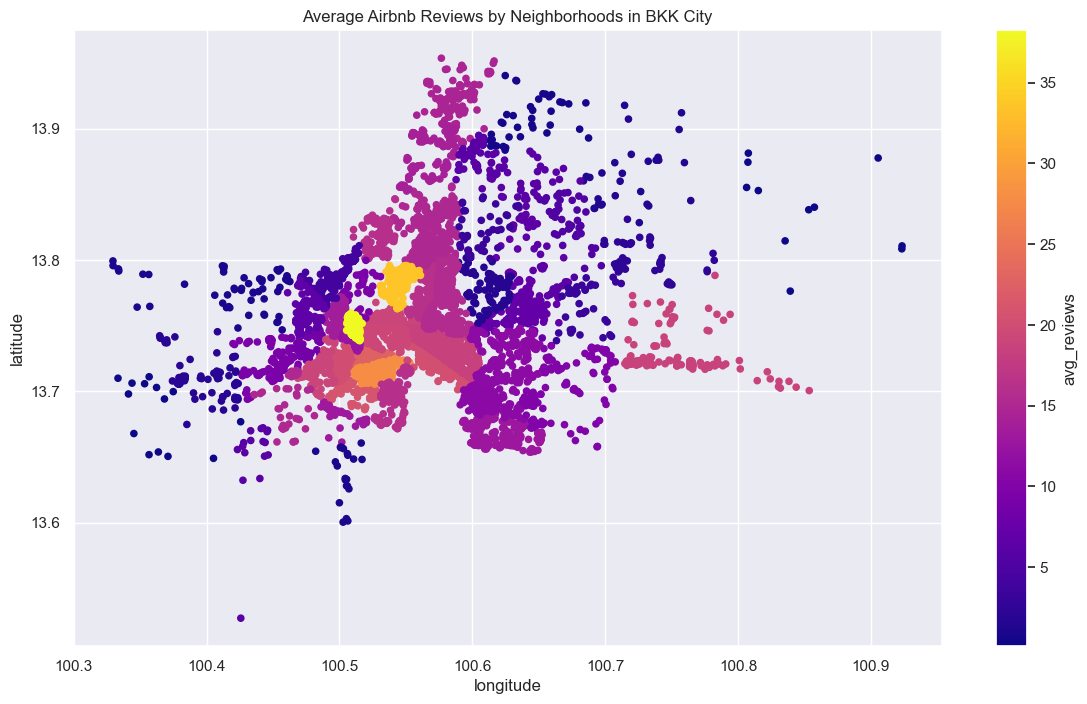

In [457]:
# Group the data by neighborhood and calculate the average number of reviews
neighbourhood_avg_reviews = df.groupby("neighbourhood")["total_reviews"].mean()

# Create a new DataFrame with the average number of reviews for each neighborhood
neighbourhood_reviews = pd.DataFrame({"neighbourhood": neighbourhood_avg_reviews.index, "avg_reviews": neighbourhood_avg_reviews.values})

# Merge the average number of reviews data with the original DataFrame
df = df.merge(neighbourhood_reviews, on="neighbourhood")

# Create the scattermapbox plot
fig = df.plot.scatter(x="longitude", y="latitude", c="avg_reviews", title="Average Airbnb Reviews by Neighborhoods in BKK City", figsize=(14,8), cmap="plasma")

# Display the scatter map
fig


**Correlation Heatmap Visualization**

In [461]:
# Korelasi
corr = df[['price', 'minimum_nights', 'total_reviews', 'reviews_per_month',
     'host_listings_count', 'number_of_reviews_ltm']].corr(method= "spearman")
corr

,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,number_of_reviews_ltm
price,1.000000,-0.070673,0.011348,0.113991,0.091734,0.083603
minimum_nights,-0.070673,1.000000,0.024818,-0.083898,-0.118235,0.004698
total_reviews,0.011348,0.024818,1.000000,0.477701,0.227290,0.703731
reviews_per_month,0.113991,-0.083898,0.477701,1.000000,0.211903,0.575812
host_listings_count,0.091734,-0.118235,0.227290,0.211903,1.000000,0.280851
number_of_reviews_ltm,0.083603,0.004698,0.703731,0.575812,0.280851,1.000000


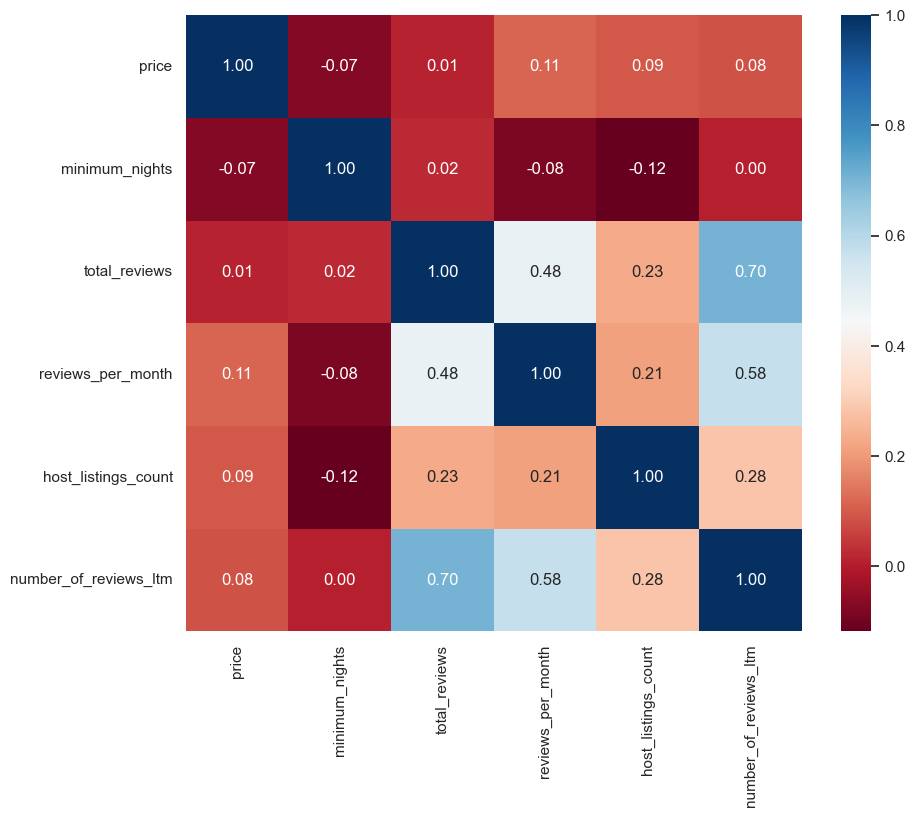

In [459]:
# correlation heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# **Insight dan Rekomendasi**

**Insight**
1. Khlong Toei dan Vadhana memiliki permintaan tertinggi untuk penyewaan Airbnb, sebagaimana dibuktikan dengan banyaknya listing di neighborhoods ini. 
2. Harga rata-rata yang banyak diminati oleh para traveller dikisaran 1000 - 1500 baht. 
3. Mayoritas listing di Airbnb adaan yang paling besar diminati untuk type entire homes/apartments dan juga Private Rooms , dibanding dengan peminat listing room yang cukup kecil.
4. Berdasarkan Number of review para traveler Airbnb, di daerah Khlong tei dan Vadhana memiliki ulasan yang paling tinggi dibandingkan dengan area neighborhood  lainnya.

**Recomendation**

1. untuk area neighborhood top 3, yaitu Khlong Toei,Vadhana & Ratchathewi. Hal ini dapat menjadikan area yang menarik bagi para host untuk berinvestasi di properti.
2. Memberikan discount harga untuk penyewaan berikutnya bagi pengguna yg memberikan review, karena review dari pengguna setidaknya dapat mempengaruhi minimum_nights, yang akan berdampak pada peningkatan income bagi host & Airbnb